In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [90]:
df_schulferien = pd.read_csv('../data_preprocessed/Schulferien.csv', dtype={"canton": "string", "population": "int32"})
df_schulferien['start'] = pd.to_datetime(df_schulferien['holidays_start'])
df_schulferien['end'] = pd.to_datetime(df_schulferien['holidays_end'])
df_schulferien = df_schulferien.drop(columns=["holidays_start", "holidays_end"])

In [91]:
def get_holiday_people(date):
    filtered_holidays = df_schulferien[(df_schulferien['start']<=date)&(df_schulferien['end']>=date)]
    is_national_holiday = (filtered_holidays["canton"]=="national").sum()
    if is_national_holiday:
        people = 7917100
    elif not(filtered_holidays.empty):
        filtered_holidays = filtered_holidays[filtered_holidays["canton"]!="national"]
        people = sum(filtered_holidays["population"])
    else: people=0
    return people

In [92]:
parse_dates = ["start", "end"]
df_data = pd.read_csv("../data_preprocessed/df_data_with_weather.csv", parse_dates=parse_dates)
df_data["start_hour"] = df_data["start"].dt.hour
df_data["travel_duration"] = (df_data["end"] - df_data["start"]).dt.total_seconds()//60
df_data.drop(df_data[df_data["travel_duration"] < 0].index, inplace=True)  # remove negative travel durations
df_data["line_category"] = df_data["line"].astype("category").cat.codes
df_data["holidays"] = df_data["date"].apply(get_holiday_people)
df_data_feat_eng = df_data.drop(["date", "start", "end", "line", "latest_res_dt"], axis=1)
df_data_feat_eng

,capacity,leisure_biking:idx,t_2m:C,precip_24h:mm,lat_from,lon_from,lat_to,lon_to,book_in_advance,day_of_week,week,year,start_hour,travel_duration,line_category,holidays
0,15.0,0.238462,1.938462,0.218462,47.378177,8.540212,47.547412,7.589563,0.0,6,11,2021,6,53.0,3,0
1,9.0,0.369231,8.023077,0.005385,47.378177,8.540212,47.547412,7.589563,0.0,4,12,2021,6,53.0,3,0
2,9.0,0.369231,8.023077,0.005385,47.378177,8.540212,47.547412,7.589563,0.0,4,12,2021,10,53.0,3,0
3,9.0,0.369231,8.023077,0.005385,47.378177,8.540212,47.547412,7.589563,0.0,4,12,2021,14,53.0,3,0
4,13.0,0.369231,8.023077,0.005385,47.378177,8.540212,47.547412,7.589563,0.0,4,12,2021,16,53.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115744,12.0,0.923077,17.561538,0.000000,46.996727,6.935702,46.384419,6.235966,0.0,4,38,2021,21,60.0,4,0
115745,6.0,0.450000,18.523077,2.086923,47.204192,7.542689,46.384419,6.235966,0.0,5,35,2021,20,93.0,4,0
115746,6.0,0.626923,14.538462,0.148462,46.781545,6.640944,46.384419,6.235966,0.0,5,34,2021,21,40.0,4,886500
115747,12.0,0.923077,17.561538,0.000000,46.384419,6.235966,46.384419,6.235966,0.0,4,38,2021,22,0.0,4,0


In [93]:
df_data_feat_eng.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity,115747.0,1.256076e+01,7.052237e+00,2.000000,8.000000,1.200000e+01,1.500000e+01,4.400000e+01
leisure_biking:idx,115747.0,5.790109e-01,2.505841e-01,0.000000,0.369231,6.346154e-01,8.000000e-01,9.269231e-01
t_2m:C,115747.0,1.593005e+01,5.133613e+00,-1.538462,12.000000,1.694615e+01,1.973846e+01,2.552308e+01
precip_24h:mm,115747.0,4.301544e+00,6.983296e+00,0.000000,0.013846,8.100000e-01,5.604615e+00,3.856462e+01
lat_from,115747.0,4.703938e+01,3.849260e-01,45.832168,46.853084,4.713290e+01,4.737818e+01,4.756622e+01
lon_from,115747.0,7.859348e+00,8.110987e-01,6.111986,7.242911,7.709870e+00,8.540212e+00,9.554045e+00
lat_to,115747.0,4.703035e+01,3.980118e-01,45.832168,46.781545,4.713290e+01,4.737818e+01,4.756622e+01
lon_to,115747.0,7.877219e+00,8.325878e-01,6.111986,7.350063,7.869000e+00,8.540212e+00,9.554045e+00
book_in_advance,115747.0,6.913911e+01,1.142977e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,8.844400e+04
day_of_week,115747.0,4.056848e+00,1.823398e+00,0.000000,3.000000,4.000000e+00,5.000000e+00,6.000000e+00


In [41]:
dict(enumerate(df_data['line'].astype("category").cat.categories))

{0: 'Div',
 1: 'IC 1',
 2: 'IC 2/21',
 3: 'IC 3',
 4: 'IC 5',
 5: 'IC 51',
 6: 'IC 6/61',
 7: 'IC 8'}

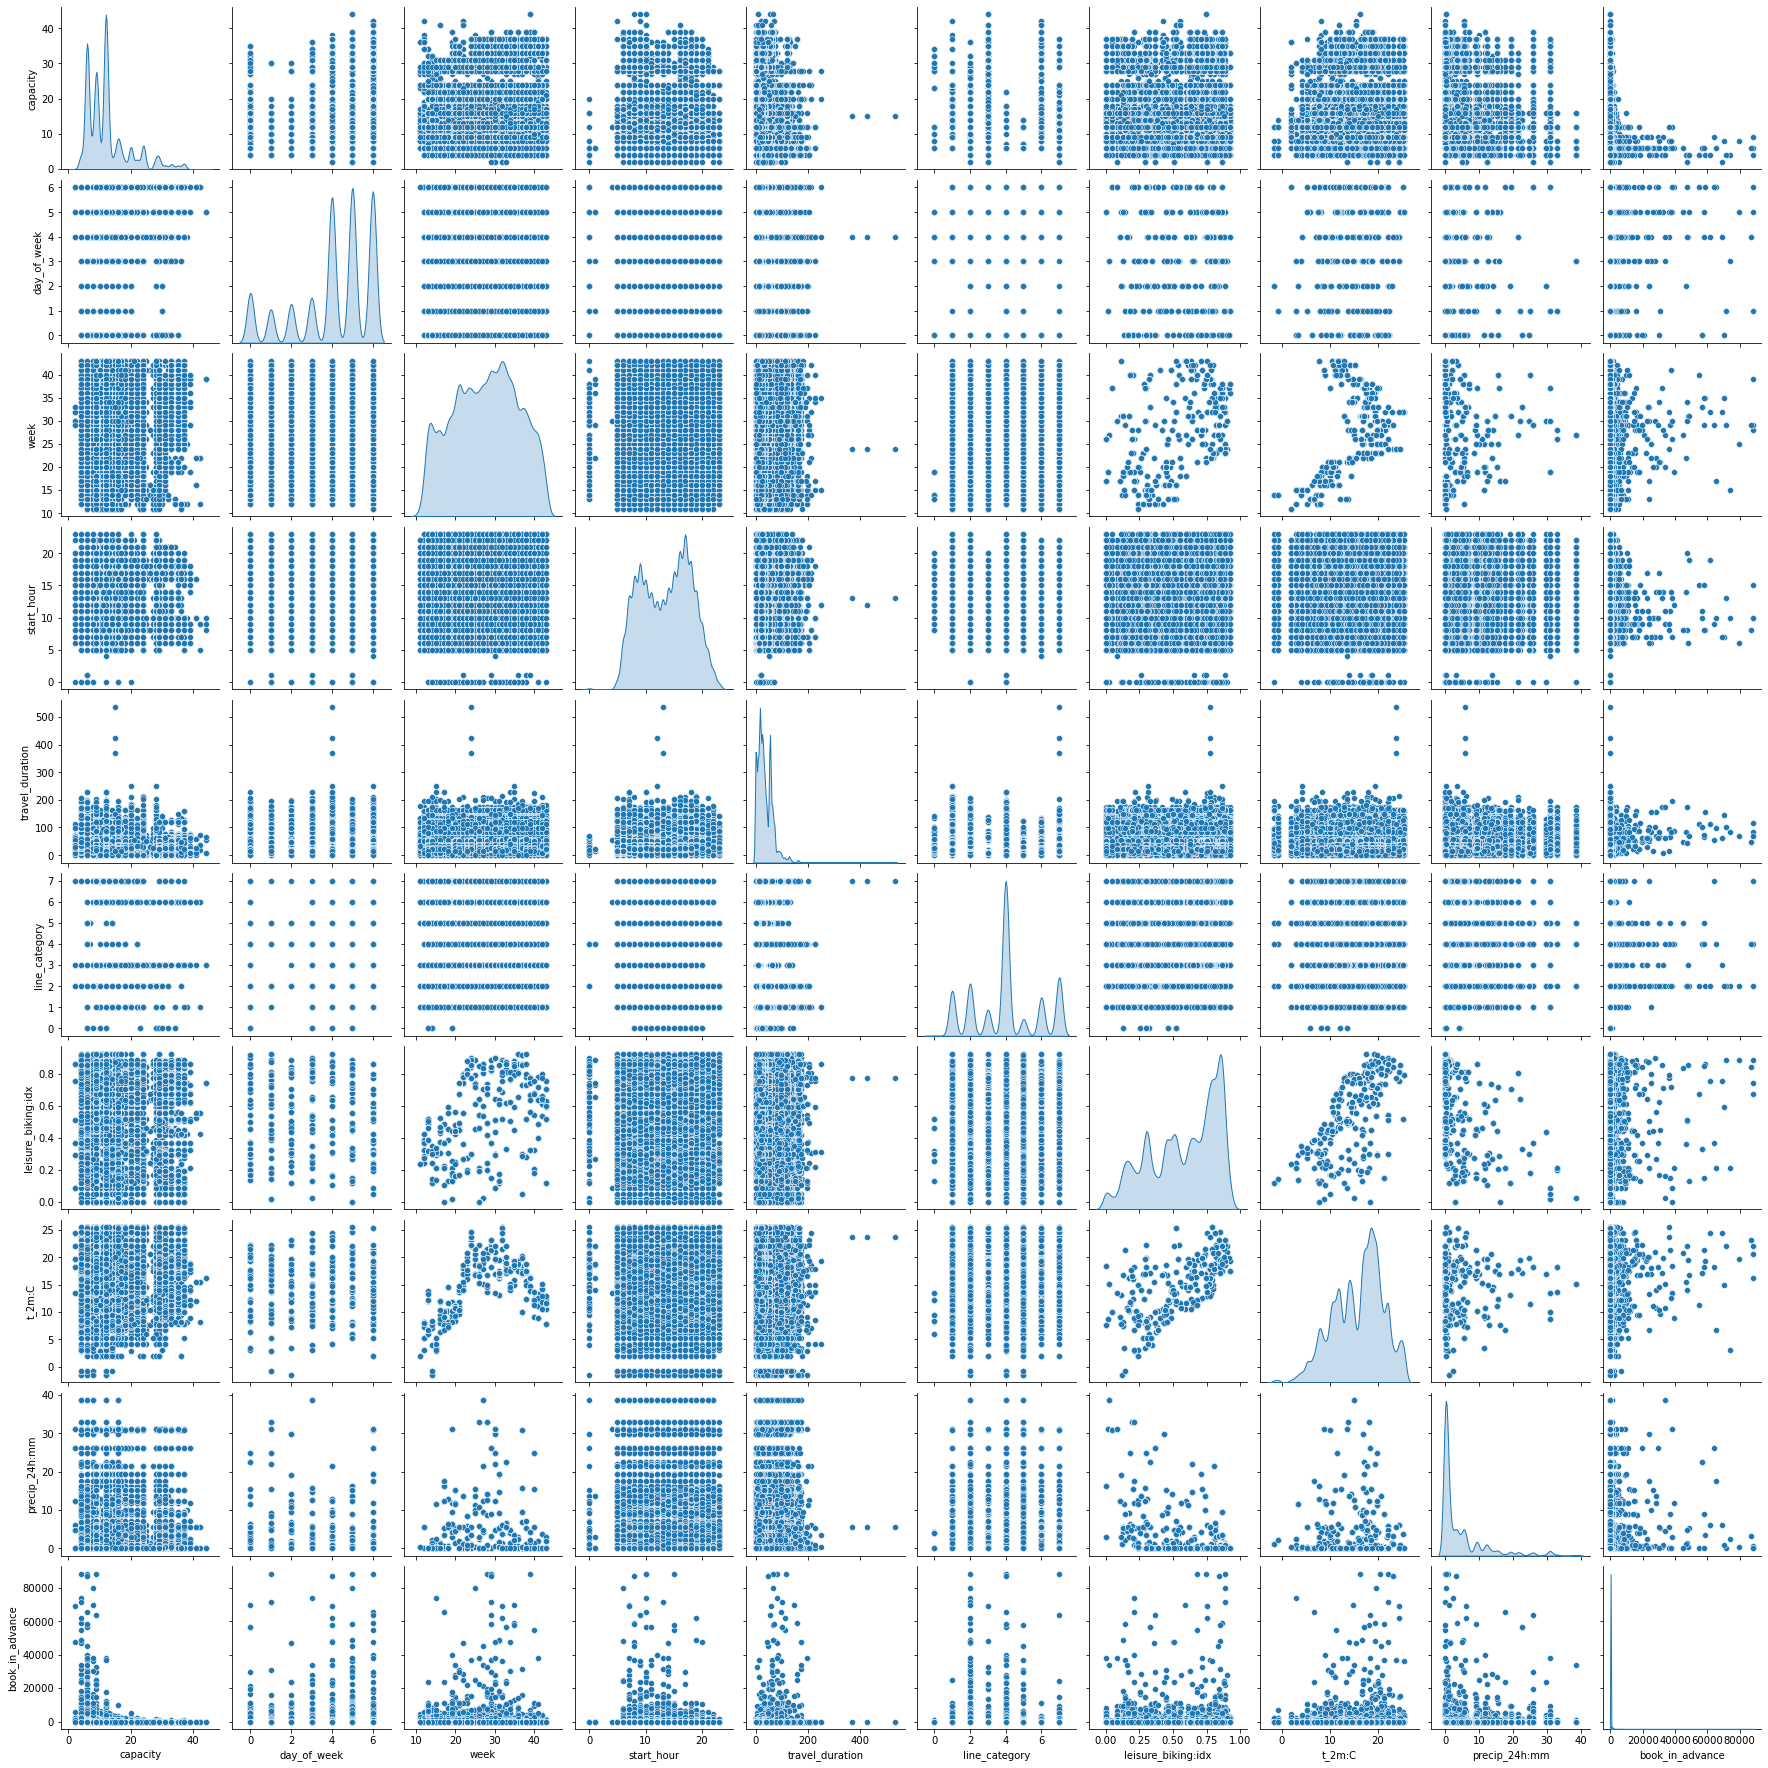

In [28]:
sns.pairplot(df_data_feat_eng[['capacity', 'day_of_week', 'week', 'start_hour', 'travel_duration', 'line_category', 'leisure_biking:idx', 't_2m:C',	'precip_24h:mm', 'book_in_advance']], diag_kind="kde")

In [94]:
correlation = df_data_feat_eng.corr(method='pearson')
columns = correlation.abs().nlargest(10, 'book_in_advance').index
columns

Index(['book_in_advance', 'travel_duration', 'capacity', 'holidays',
       'start_hour', 'line_category', 'lon_to', 'lon_from',
       'leisure_biking:idx', 'week'],
      dtype='object')

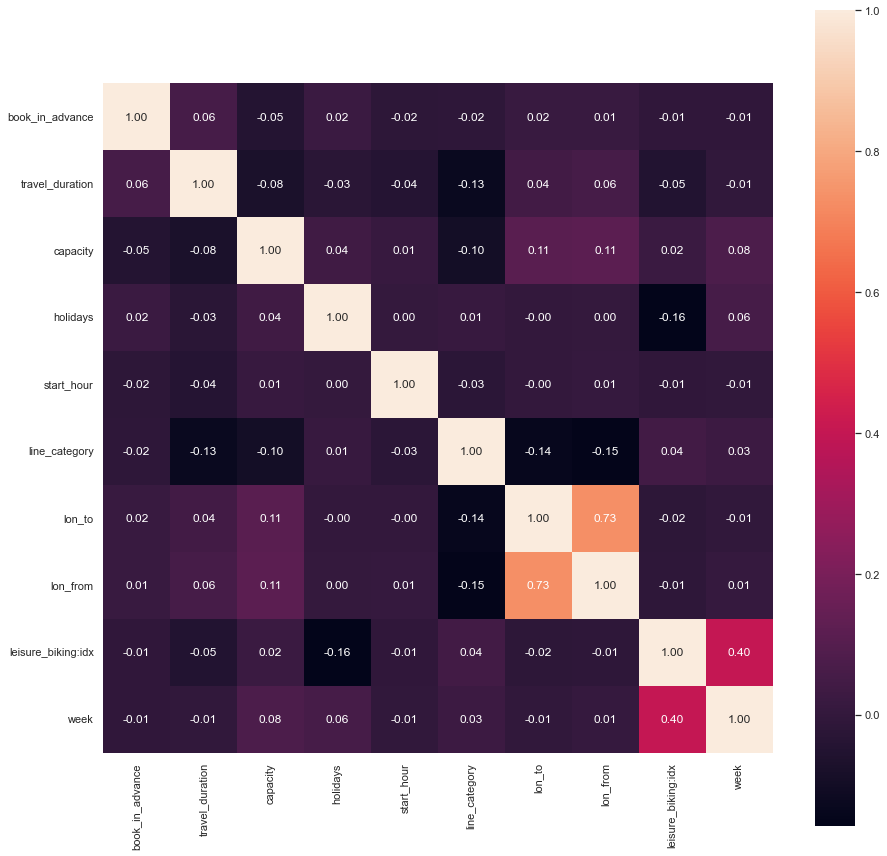

In [97]:
correlation_map = np.corrcoef(df_data_feat_eng[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [58]:
# Downsampling to reduce imbalance
#df_data_reduced = df_data_feat_eng.drop(df_data_feat_eng[df_data_feat_eng["book_in_advance"] == 0].sample(frac=0.9).index)

In [108]:
#df_X = df_data_feat_eng.drop(["book_in_advance", "year"], axis=1)
df_X = df_data_feat_eng[columns]
df_Y = df_data_feat_eng["book_in_advance"]
display(df_X.head(5))
display(df_Y.head(5))

,book_in_advance,travel_duration,capacity,holidays,start_hour,line_category,lon_to,lon_from,leisure_biking:idx,week
0,0.0,53.0,15.0,0,6,3,7.589563,8.540212,0.238462,11
1,0.0,53.0,9.0,0,6,3,7.589563,8.540212,0.369231,12
2,0.0,53.0,9.0,0,10,3,7.589563,8.540212,0.369231,12
3,0.0,53.0,9.0,0,14,3,7.589563,8.540212,0.369231,12
4,0.0,53.0,13.0,0,16,3,7.589563,8.540212,0.369231,12


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: book_in_advance, dtype: float64

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=345)

In [111]:
from sklearn.linear_model import RidgeCV

scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_val = scaler.transform(X_val)
ridge = RidgeCV(cv=5)
ridge.fit(rescaledX_train, y_train)
# Prediction using test set 
y_pred = ridge.predict(rescaledX_val)
mae=metrics.mean_absolute_error(y_val, y_pred)
mse=metrics.mean_squared_error(y_val, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_val, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.9999999999988275
MAE:  0.00016083287015501143
MSE:  1.4644215359674402e-06


In [112]:
rescaledX_test = scaler.transform(X_test)
# Prediction using test set 
y_pred = ridge.predict(rescaledX_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.9999999999988239
MAE:  0.00015975258033512467
MSE:  1.2614802773234809e-06


In [139]:
pd.DataFrame({"y_pred": y_pred, "y_val": y_test.values, "difference": y_pred - y_test.values}).head(10)

,y_pred,y_val,difference
0,0.00,0.0,0.00
1,0.00,0.0,0.00
2,0.00,0.0,0.00
3,0.00,0.0,0.00
4,934.03,0.0,934.03
5,0.00,0.0,0.00
6,0.00,0.0,0.00
7,0.00,0.0,0.00
8,0.00,0.0,0.00
9,0.00,0.0,0.00


In [122]:
from sklearn.ensemble import RandomForestRegressor

scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_val = scaler.transform(X_val)
rf_regressor = RandomForestRegressor(n_estimators=100 ,  random_state=123)
rf_regressor.fit(rescaledX_train,y_train)
#Prediction using test set 
y_pred = rf_regressor.predict(rescaledX_val)
mae=metrics.mean_absolute_error(y_val, y_pred)
mse=metrics.mean_squared_error(y_val, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_val, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.9998763287672428
MAE:  0.2622591792656589
MSE:  154.46648802591818


In [119]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_val = scaler.transform(X_val)
xgb_model = XGBRegressor(n_estimators=20, max_depth=5, learning_rate=0.01)
xgb_model.fit(rescaledX_train, y_train)
#Prediction using test set 
y_pred = xgb_model.predict(rescaledX_val)
mae=metrics.mean_absolute_error(y_val, y_pred)
mse=metrics.mean_squared_error(y_val, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_val, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.33168143146160634
MAE:  52.684948808281774
MSE:  834735.935456409


In [120]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15, weights="distance")
knn.fit(rescaledX_train,y_train)
# Prediction using test set 
y_pred = knn.predict(rescaledX_val)
mae=metrics.mean_absolute_error(y_val, y_pred)
mse=metrics.mean_squared_error(y_val, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_val, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.9929549177576809
MAE:  15.718914281066107
MSE:  8799.371426669768


In [107]:
pd.DataFrame({"y_pred": y_pred, "y_val": y_val.values, "difference": y_pred - y_val.values}).head(15)

,y_pred,y_val,difference
0,79.367213,0.0,79.367213
1,200.014669,0.0,200.014669
2,0.000000,0.0,0.000000
3,0.000000,0.0,0.000000
4,0.000000,934.0,-934.000000
5,0.000000,0.0,0.000000
6,61.409155,0.0,61.409155
7,0.000000,0.0,0.000000
8,0.000000,0.0,0.000000
9,0.000000,0.0,0.000000


In [104]:
y_pred = knn.predict(scaler.transform(X_test))
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: -0.0588952231446398
MAE:  108.8239081814958
MSE:  1135812.7911389975


In [ ]:
import pickle

# save xgb model to pickle file
pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))

In [124]:
import numpy as np
index_with_zero_wait_time = y_test[y_test == 0.0].reset_index().index
zero_wait_time = y_pred[index_with_zero_wait_time] - y_test[y_test == 0.0]
print(np.mean(zero_wait_time))
print(len(zero_wait_time))
wait_time_predictions = np.delete(y_pred, index_with_zero_wait_time) - y_test[y_test != 0.0]
print(np.mean(wait_time_predictions))
print(len(wait_time_predictions))

6.755761479134568
22291
-1953.642358203567
859


## Train capacity model

In [84]:
df_X = df_data_feat_eng.drop(["capacity", "lat_from", "lon_from", "lat_to", "lon_to", "book_in_advance", "year", "travel_duration"], axis=1)
df_Y = df_data_feat_eng["capacity"]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=123)
X_train

,leisure_biking:idx,t_2m:C,precip_24h:mm,day_of_week,week,start_hour,line_category
11271,0.850000,18.584615,0.032308,4,26,6,6
35145,0.461538,12.161538,0.130769,4,13,9,6
46766,0.430769,7.976923,0.224615,1,16,9,4
23011,0.161538,10.692308,4.536154,4,20,10,7
38552,0.369231,8.023077,0.005385,4,12,17,7
...,...,...,...,...,...,...,...
63207,0.511538,22.138462,4.851538,4,30,20,4
61405,0.211538,8.915385,11.825385,6,19,22,4
17730,0.715385,19.861538,0.857692,5,28,16,6
28030,0.688462,19.530769,0.163846,0,32,19,2


In [75]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=2000, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train,y_train)
# Prediction using test set 
y_pred = xgb_model.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.43446559347313307
MAE:  3.7700448519982737
MSE:  28.25570876551264


In [186]:
import pickle

# save xgb model to pickle file
pickle.dump(xgb_model, open("capacity_model.pkl", "wb"))

In [172]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100,  random_state=123)
rf_regressor.fit(X_train,y_train)
# Prediction using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

R2 square: 0.3965051078693699
MAE:  3.5664243795644577
MSE:  29.83784793039583


## Build Neural Network

In [79]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.initializers import HeNormal
from keras.callbacks import ReduceLROnPlateau

def build_model():
    model = keras.Sequential([
    Dense(20,kernel_initializer=HeNormal(), activation='relu', input_shape=[len(X_train.columns)]),
    Dropout(0.5),
    Dense(10, activation='relu'),
    Dense(1)
    ])

    optimizer = keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [80]:
mlp_model = build_model()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1,
                              patience=5, min_lr=0.00001)

EPOCHS = 100
history = mlp_model.fit(
  normed_train_data, y_train,
  batch_size = 128,
  epochs=EPOCHS, 
  validation_data=(normed_val_data, y_val),
  callbacks=[reduce_lr])

Epoch 1/100
  7/724 [..............................] - ETA: 6s - loss: 161395.4375 - mae: 52.0527 - mse: 161395.4375  

2022-03-25 03:41:53.701171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


724/724 [==============================] - ETA: 0s - loss: 1346577.0000 - mae: 78.6573 - mse: 1346577.0000

2022-03-25 03:42:00.977476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


724/724 [==============================] - 8s 10ms/step - loss: 1346577.0000 - mae: 78.6573 - mse: 1346577.0000 - val_loss: 1250471.0000 - val_mae: 82.0189 - val_mse: 1250471.0000
Epoch 2/100
724/724 [==============================] - 8s 10ms/step - loss: 1342494.2500 - mae: 99.7020 - mse: 1342494.2500 - val_loss: 1246572.5000 - val_mae: 103.7915 - val_mse: 1246572.5000
Epoch 3/100
724/724 [==============================] - 6s 9ms/step - loss: 1339311.8750 - mae: 115.7991 - mse: 1339311.8750 - val_loss: 1243966.2500 - val_mae: 112.2323 - val_mse: 1243966.2500
Epoch 4/100
724/724 [==============================] - 7s 10ms/step - loss: 1338003.6250 - mae: 121.4407 - mse: 1338003.6250 - val_loss: 1242245.3750 - val_mae: 115.6823 - val_mse: 1242245.3750
Epoch 5/100
724/724 [==============================] - 7s 10ms/step - loss: 1336087.0000 - mae: 123.3744 - mse: 1336087.0000 - val_loss: 1240842.8750 - val_mae: 117.5261 - val_mse: 1240842.8750
Epoch 6/100
724/724 [=========================

In [82]:
#Prediction using test set 
y_pred = mlp_model.predict(normed_test_data)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

2022-03-25 04:12:18.371605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


R2 square: 0.008367451963268158
MAE:  110.91933089863919
MSE:  1063664.1922182213
